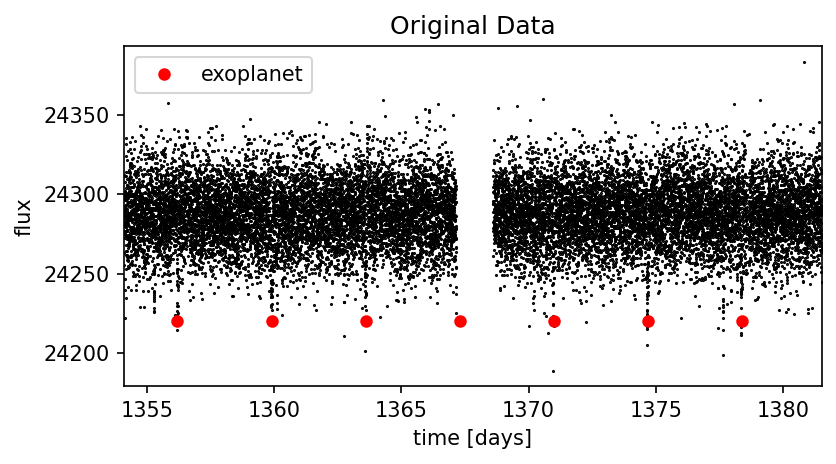

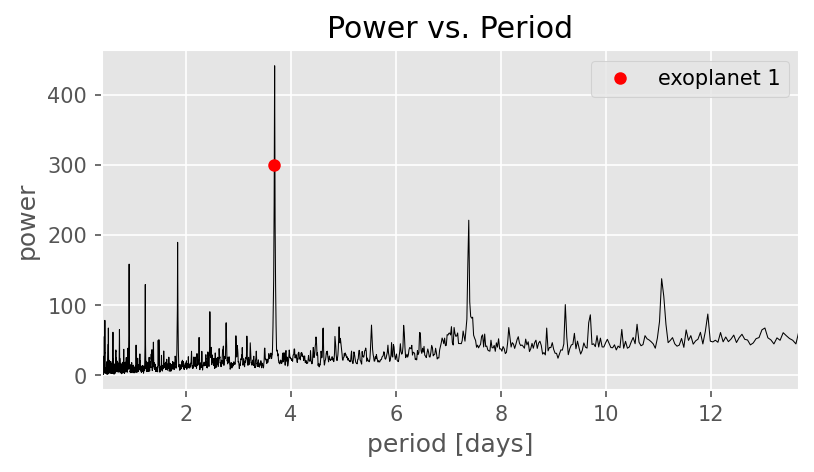


************************************************
The period of planet 1 is = 3.6917 days
************************************************


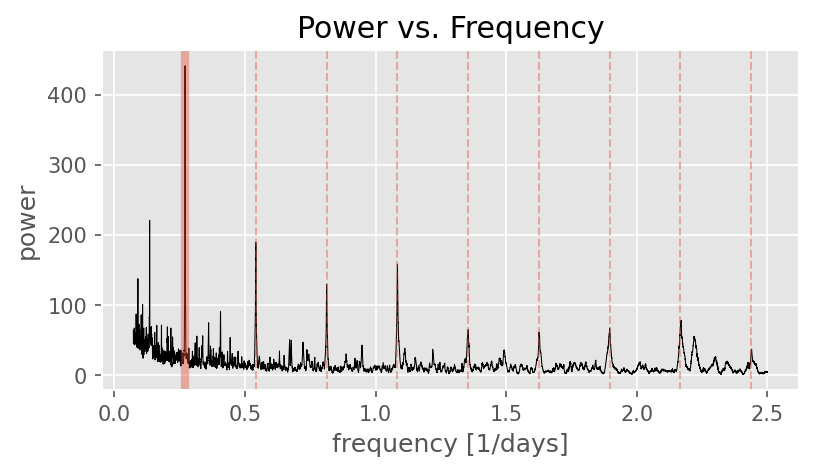

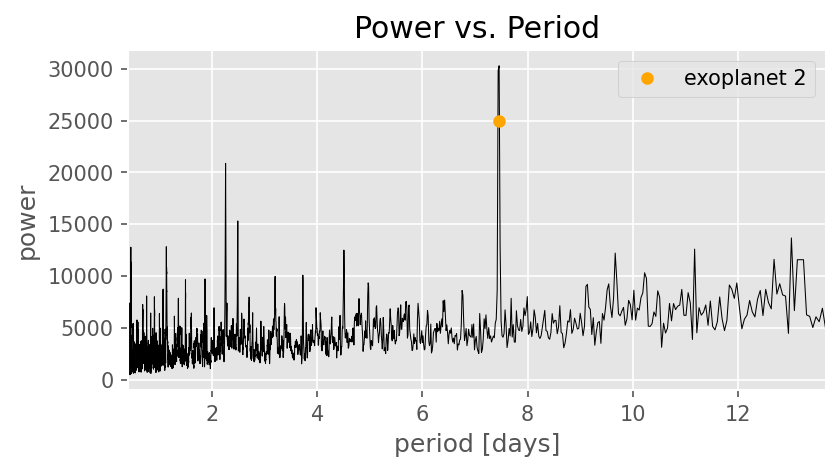


************************************************
The period of planet 2 is = 7.4598 days
************************************************


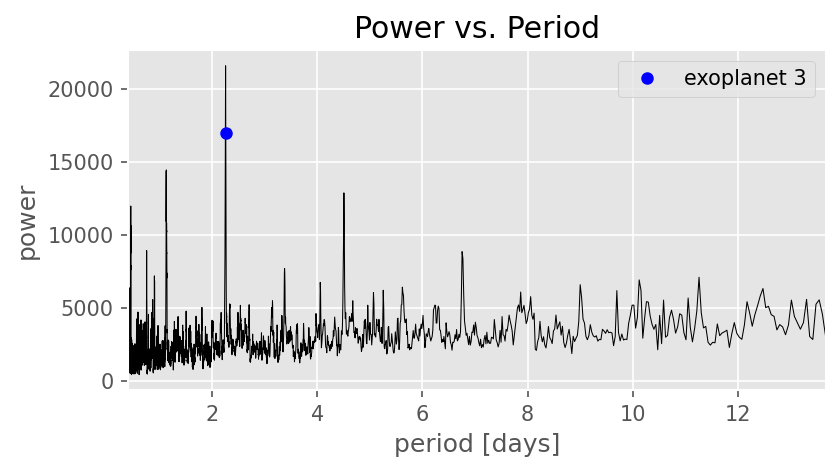


************************************************
The period of planet 3 is = 2.2540 days
************************************************


In [2]:
# Part 1: Analyzing the data

# Plotting parameters
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
import matplotlib.pyplot as plt
# Package imports
import numpy as np
from astropy.io import fits
from astropy.timeseries import BoxLeastSquares

# Set identifier for the data file
url = "https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00307210830-s02_tess_v1_lc.fits"

# Download and read the light curve file
with fits.open(url) as hdus:
    data = hdus[1].data
    time = data["TIME"]
    flux = data["PDCSAP_FLUX"]
    flux_err = data["PDCSAP_FLUX_ERR"]
    quality = data["QUALITY"]
    
# Mask out any data with imperfect quality
m = (quality == 0)
time = time[m]
flux = flux[m]
flux_err = flux_err[m]

# Plot the flux as a function of time
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(6, 3))
ax.plot(time, flux, ".k", ms=1)
plt.plot(1356.2, 24220, marker="o", markersize=5, markeredgecolor="red", \
                      markerfacecolor="red")
plt.plot(1356.2+3.7, 24220, marker="o", markersize=5, markeredgecolor="red", \
                      markerfacecolor="red")
plt.plot(1356.2+3.7*2, 24220, marker="o", markersize=5, markeredgecolor="red", \
                      markerfacecolor="red" )
plt.plot(1356.2+3.7*3, 24220, marker="o", markersize=5, markeredgecolor="red", \
                      markerfacecolor="red",linestyle='None',label='exoplanet')
plt.plot(1356.2+3.7*4, 24220, marker="o", markersize=5, markeredgecolor="red", \
                      markerfacecolor="red" )
plt.plot(1356.2+3.7*5, 24220, marker="o", markersize=5, markeredgecolor="red", \
                      markerfacecolor="red" )
plt.plot(1356.2+3.7*6, 24220, marker="o", markersize=5, markeredgecolor="red", \
                      markerfacecolor="red" )
plt.legend(loc="upper left",fontsize=10)
ax.set_xlim([time.min(), time.max()])
ax.set_title("Original Data")
ax.set_xlabel("time [days]")
ax.set_ylabel("flux");

# using the style for the plot
plt.style.use('ggplot')
# Compute the box least squares periodogram  
bls = BoxLeastSquares(t=time, y=flux, dy=flux_err)    
durations = np.linspace(0.05, 0.2, 10)                    # Initiatlize the durations 
results = bls.autopower(durations, frequency_factor=5.0)  # Power's results 

# Plot the periodogram 1
rcParams["figure.dpi"] = 150
fig, ax = plt.subplots(1, 1, figsize=(6, 3))        
ax.plot(results.period, results.power, "k", lw=0.5)       # power vs period
ax.set_xlim(results.period.min(), results.period.max())   # x_min - x_max
ax.set_xlabel("period [days]")
ax.set_ylabel("power")
plt.plot(3.6871, 300, marker="o", markersize=5, markeredgecolor="red", \
                      markerfacecolor="red",linestyle='None',label='exoplanet 1')
ax.set_title("Power vs. Period")
plt.legend(loc="upper right",fontsize=10)
plt.show()

# Find the index associated with the maximum peak 
index  = np.argmax(results.power) 
# Find the period of the peak
period = results.period[index]
print('\n************************************************')
print('The period of planet 1 is = %.4f' % period, 'days')
print('************************************************')

# Plot the periodogram 2
rcParams["figure.dpi"] = 150
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(1/results.period, results.power, "k", lw=0.5)
#ax.set_xlim(1/results.period.max(),1/results.period.min())
ax.set_xlabel("frequency [1/days]")
ax.set_ylabel("power")
ax.set_title("Power vs. Frequency")
# Highlight the harmonics of the peak frequency
# Find the index associated with the maximum peak 
index  = np.argmax(results.power) 
# Find the period of the peak
period = results.period[index]
ax.axvline(1./period, alpha=0.4, lw=4)
for n in range(2, 10):
    ax.axvline(n * 1. /period , alpha=0.4, lw=1, linestyle="dashed")
    
# Parameter identification to be used in transit_mask
index = np.argmax(results.power)
period = results.period[index]       # calculates the period associated with the max power
t0 = results.transit_time[index]     # calculates the transient time t0
duration = results.duration[index]   # calculates the duration time

# Find the in-transit points
in_transit = bls.transit_mask(time, period, 2*duration, t0)
# Re-run the algorithm
bls2     = BoxLeastSquares(time[~in_transit], flux[~in_transit])
results2 = bls2.autopower(durations, frequency_factor=5.0)

# Plot the periodogram 1
rcParams["figure.dpi"] = 150
fig, ax = plt.subplots(1, 1, figsize=(6, 3))        
ax.plot(results2.period, results2.power, "k", lw=0.5)       # power vs period
ax.set_xlim(results2.period.min(), results2.period.max())   # x_min - x_max
ax.set_xlabel("period [days]")
ax.set_ylabel("power")
plt.plot(7.4598, 25000, marker="o", markersize=5, markeredgecolor="orange", \
                      markerfacecolor="orange",linestyle='None',label='exoplanet 2')
ax.set_title("Power vs. Period")
plt.legend(loc="upper right",fontsize=10)
plt.show()

# Find the index associated with the maximum peak 
index  = np.argmax(results2.power) 
# Find the period of the peak
period = results2.period[index]
print('\n************************************************')
print('The period of planet 2 is = %.4f' % period, 'days')
print('************************************************')

# Parameter identification to be used in transit_mask
index = np.argmax(results2.power)
period = results2.period[index]       # calculates the period associated with the max power
t0 = results2.transit_time[index]     # calculates the transient time t0
duration = results2.duration[index]   # calculates the duration time

# Find the in-transit points
in_transit2 = in_transit | bls.transit_mask(time, period, 2*duration, t0)
# Re-run the algorithm
bls3     = BoxLeastSquares(time[~in_transit2], flux[~in_transit2])
results3 = bls3.autopower(durations, frequency_factor=5.0)

# Plot the periodogram 1
rcParams["figure.dpi"] = 150
fig, ax = plt.subplots(1, 1, figsize=(6, 3))        
ax.plot(results3.period, results3.power, "k", lw=0.5)       # power vs period
ax.set_xlim(results3.period.min(), results3.period.max())   # x_min - x_max
ax.set_xlabel("period [days]")
ax.set_ylabel("power")
plt.plot(2.2540, 17000, marker="o", markersize=5, markeredgecolor="blue", \
                      markerfacecolor="blue",linestyle='None',label='exoplanet 3')
ax.set_title("Power vs. Period")
plt.legend(loc="upper right",fontsize=10)
plt.show()

# Find the index associated with the maximum peak 
index  = np.argmax(results3.power) 
# Find the period of the peak
period = results3.period[index]
print('\n************************************************')
print('The period of planet 3 is = %.4f' % period, 'days')
print('************************************************')

In [3]:
# Part 2: Determining the initial conditions: orbital radii and tangential velocities

# constants
m_star = 0.313*1.98847*10**30    # mass of star (kg)
G = 6.67*10**-11    # gravitational constant (m^3/kgs^2)
p1 = 3.6917*24*3600    # period of exoplanet 1 (s)
p2 = 7.4598*24*3600    # period of exoplanet 2 (s)
p3 = 2.2540*24*3600    # period of exoplanet 3 (s)

# Find orbital radii
def orad(p):
    return (G*m_star*p**2/4/np.pi**2)**(1/3)

orad1 = orad(p1)
orad2 = orad(p2)
orad3 = orad(p3)
print('\n************************************************')
print('The orbital radius of planet 1 is = %.4f' % orad1, 'm')
print('The orbital radius of planet 2 is = %.4f' % orad2, 'm')
print('The orbital radius of planet 3 is = %.4f' % orad3, 'm')
print('************************************************')

# Find velocities 
def vel(orad,p):
    return 2*np.pi*orad/p

v1 = vel(orad1,p1)
v2 = vel(orad2,p2)
v3 = vel(orad3,p3)
print('\n************************************************')
print('The magnitude of the velocity of planet 1 is = %.4f' % v1, 'm/s')
print('The magnitude of the velocity of planet 2 is = %.4f' % v2, 'm/s')
print('The magnitude of the velocity of planet 3 is = %.4f' % v3, 'm/s')
print('************************************************')


************************************************
The orbital radius of planet 1 is = 4747189721.6489 m
The orbital radius of planet 2 is = 7587588628.4727 m
The orbital radius of planet 3 is = 3416553785.9511 m
************************************************

************************************************
The magnitude of the velocity of planet 1 is = 93513.9309 m/s
The magnitude of the velocity of planet 2 is = 73967.8029 m/s
The magnitude of the velocity of planet 3 is = 110230.1698 m/s
************************************************


4746754087.769589 64634832.086014464


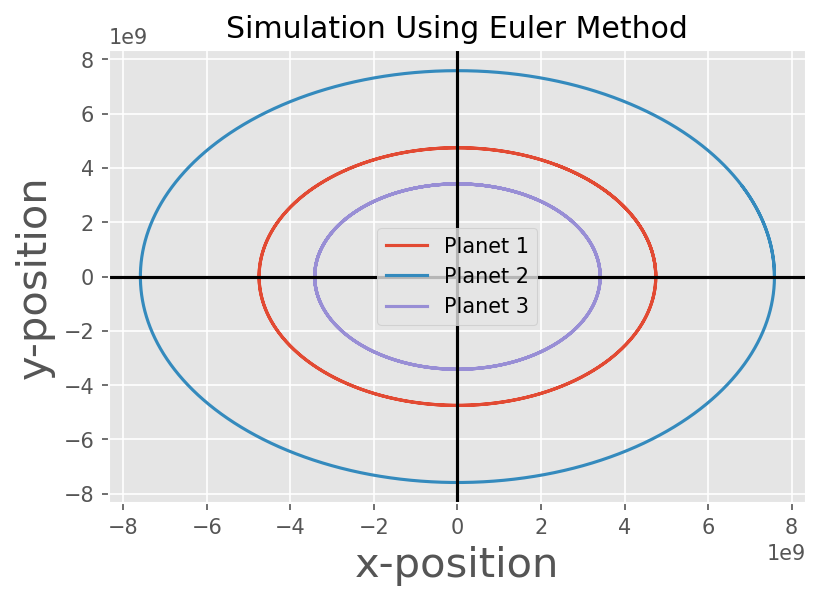

4746754087.768425 64634832.086009085


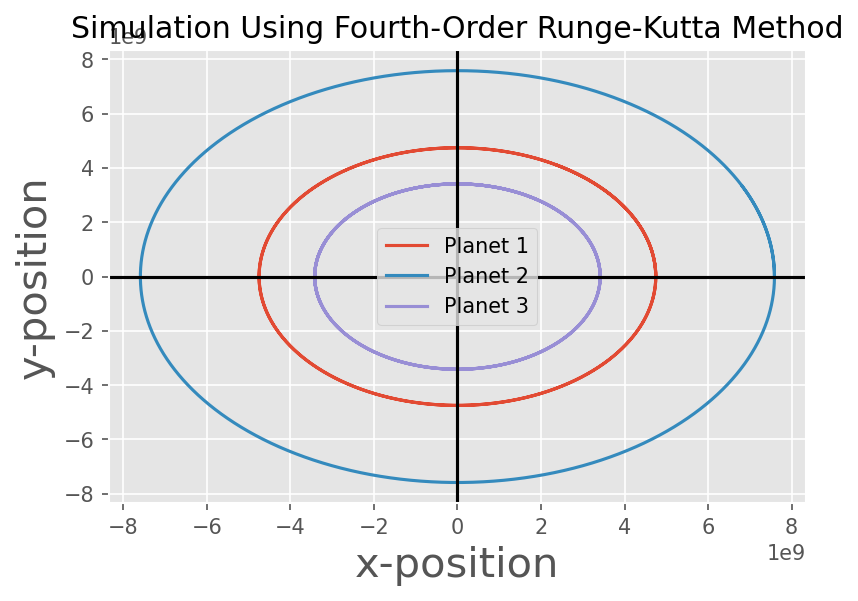

In [41]:
# Part 3: Simulating the L 98-59 system with three planets 

# constants
m_star = 0.313*1.98847*10**30    # mass of star (kg)
G = 6.67*10**-11                 # gravitational constant (m^3/kgs^2)
orad1 = 4747189721.6489          # orbital radius of planet 1 
v1 = 93513.9309                  # magnitude of velocity of planet 1
orad2 = 7587588628.4727          # orbital radius of planet 2
v2 = 73967.8029                  # magnitude of velocity of planet 2
orad3 = 3416553785.9511          # orbital radius of planet 3
v3 = 110230.1698                 # magnitude of velocity of planet 3


# second-order differential equations
def f(r,t):
    x = r[0]
    y = r[1]
    rr = (x**2+y**2)**(1/2)
    ddx = -G*m_star*x/rr**3
    ddy = -G*m_star*y/rr**3
    return np.array([ddx,ddy],float)

# set time frame and time step
t = np.linspace(0,8*24*3600,100000)
h = (8*24*3600)/100000

# initialize velocity and position vectors
x1 = np.zeros(100000)
x0_1 = orad1
y1 = np.zeros(100000)
y0_1 = 0
vx0_1 = 0
vy0_1 = v1
vr1 = np.array([vx0_1,vy0_1],float)
r1 = np.array([x0_1,y0_1],float)

x2 = np.zeros(100000)
x0_2 = orad2
y2 = np.zeros(100000)
y0_2 = 0
vx0_2 = 0
vy0_2 = v2
vr2 = np.array([vx0_2,vy0_2],float)
r2 = np.array([x0_2,y0_2],float)

x3 = np.zeros(100000)
x0_3 = orad3
y3 = np.zeros(100000)
y0_3 = 0
vx3[0] = 0
vy3[0] = v3
vr3 = np.array([vx0_3,vy0_3],float)
r3 = np.array([x0_3,y0_3],float)

# Euler method
for i in range(100000):
    x1[i] = r1[0]
    y1[i] = r1[1]
    r1 = r1 + h*vr1
    vr1 = vr1 + h*f(r1,i*h)
    
    x2[i] = r2[0]
    y2[i] = r2[1]
    r2 = r2 + h*vr2
    vr2 = vr2 + h*f(r2,i*h)
    
    x3[i] = r3[0]
    y3[i] = r3[1]
    r3 = r3 + h*vr3
    vr3 = vr3 + h*f(r3,i*h)

print(x1[100],y1[100])
# plot
plt.plot(x1,y1,label="Planet 1")
plt.plot(x2,y2,label="Planet 2")
plt.plot(x3,y3,label="Planet 3")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel(r'x-position',fontsize=20) 
plt.ylabel(r'y-position',fontsize=20)
plt.legend(loc="best")
plt.title("Simulation Using Euler Method")
plt.show()


# re-initialize velocity and position vectors
x1 = np.zeros(100000)
x0_1 = orad1
y1 = np.zeros(100000)
y0_1 = 0
vx0_1 = 0
vy0_1 = v1
vr1 = np.array([vx0_1,vy0_1],float)
r1 = np.array([x0_1,y0_1],float)

x2 = np.zeros(100000)
x0_2 = orad2
y2 = np.zeros(100000)
y0_2 = 0
vx0_2 = 0
vy0_2 = v2
vr2 = np.array([vx0_2,vy0_2],float)
r2 = np.array([x0_2,y0_2],float)

x3 = np.zeros(100000)
x0_3 = orad3
y3 = np.zeros(100000)
y0_3 = 0
vx0_3 = 0
vy0_3 = v3
vr3 = np.array([vx0_3,vy0_3],float)
r3 = np.array([x0_3,y0_3],float)

# fourth-order Runge-Kutta method
for i in range(100000):
    x1[i] = r1[0]
    y1[i] = r1[1]
    r1 = r1 + h*vr1
    k1 = h*f(r1,i*h)
    k2 = h*f(r1+k1/2,i*h+h/2)
    k3 = h*f(r1+k2/2,i*h+h/2)
    k4 = h*f(r1+k3,i*h+h)
    vr1 = vr1 + (1/6)*(k1+2*k2+2*k3+k4)
    
    x2[i] = r2[0]
    y2[i] = r2[1]
    r2 = r2 + h*vr2
    k1 = h*f(r2,i*h)
    k2 = h*f(r2+k1/2,i*h+h/2)
    k3 = h*f(r2+k2/2,i*h+h/2)
    k4 = h*f(r2+k3,i*h+h)
    vr2 = vr2 + (1/6)*(k1+2*k2+2*k3+k4)
    
    x3[i] = r3[0]
    y3[i] = r3[1]
    r3 = r3 + h*vr3
    k1 = h*f(r3,i*h)
    k2 = h*f(r3+k1/2,i*h+h/2)
    k3 = h*f(r3+k2/2,i*h+h/2)
    k4 = h*f(r3+k3,i*h+h)
    vr3 = vr3 + (1/6)*(k1+2*k2+2*k3+k4)

print(x1[100],y1[100])
# plot
plt.figure()
plt.plot(x1,y1,label="Planet 1")
plt.plot(x2,y2,label="Planet 2")
plt.plot(x3,y3,label="Planet 3")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel(r'x-position',fontsize=20) 
plt.ylabel(r'y-position',fontsize=20)
plt.legend(loc="best")
plt.title("Simulation Using Fourth-Order Runge-Kutta Method")
plt.show()